In [1]:
import os, shutil

from keras import models, layers, optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/ls283h/python-virtual-environments/chollet/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ls283h/python-virtual-environments/chollet/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ls283h/python-virtual-environments/chollet/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qi

In [2]:
# Build the model

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64,(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
          
model.add(layers.Flatten())          
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [4]:
# Configure the model for training

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=0.0001),
             metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Data preprocessing

In [5]:
train_dir = '/home/ls283h/Work/Notebooks/Data/cats_and_dogs_small/train'
validation_dir = '/home/ls283h/Work/Notebooks/Data/cats_and_dogs_small/validation'

In [6]:
datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
for data_batch, labels_batch in train_generator:
    print(data_batch.shape)
    print(labels_batch.shape)
    break

(20, 150, 150, 3)
(20,)


In [9]:
# Fit the model using a batch generator

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)


Epoch 1/30
100/100 [==============================] - 11s 113ms/step - loss: 0.6881 - acc: 0.5400 - val_loss: 0.6643 - val_acc: 0.6250
Epoch 2/30
100/100 [==============================] - 6s 60ms/step - loss: 0.6481 - acc: 0.6195 - val_loss: 0.6402 - val_acc: 0.5980
Epoch 3/30
100/100 [==============================] - 6s 61ms/step - loss: 0.5953 - acc: 0.6835 - val_loss: 0.6054 - val_acc: 0.6600
Epoch 4/30
100/100 [==============================] - 6s 61ms/step - loss: 0.5591 - acc: 0.7050 - val_loss: 0.6057 - val_acc: 0.6790
Epoch 5/30
100/100 [==============================] - 6s 62ms/step - loss: 0.5387 - acc: 0.7175 - val_loss: 0.6192 - val_acc: 0.6680
Epoch 6/30
100/100 [==============================] - 6s 58ms/step - loss: 0.5181 - acc: 0.7345 - val_loss: 0.5715 - val_acc: 0.6930
Epoch 7/30
100/100 [==============================] - 6s 59ms/step - loss: 0.4885 - acc: 0.7625 - val_loss: 0.5714 - val_acc: 0.6970
Epoch 8/30
100/100 [==============================] - 6s 58ms/step

In [10]:
# Save the model
model.save('cats_and_dogs_small.h5')

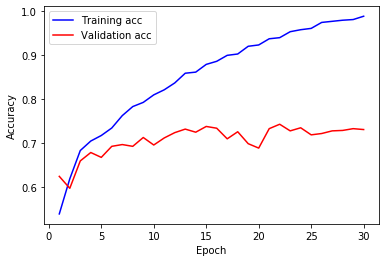

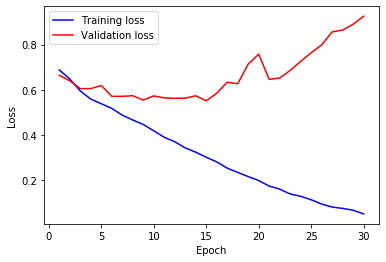

In [11]:
# Display curves of loss and accuracy

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()



# Using data augmentation

In [12]:
# Setting up a data augmentation example
datagen_example = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

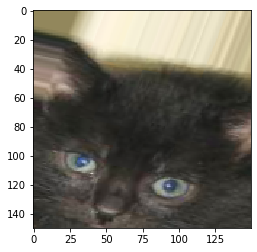

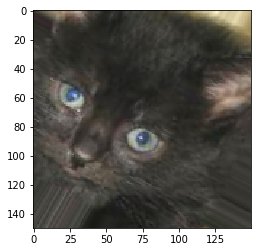

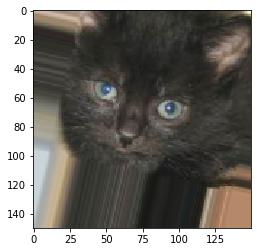

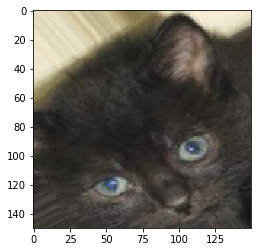

In [13]:
# display some randomly augmented training images

train_cats_dir = '/home/ls283h/Work/Notebooks/Data/cats_and_dogs_small/train/cats'

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen_example.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [14]:
# New model with dropout


model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64,(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
          
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
# Training the convnet using data-augmentation generators

train_datagen= ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen= ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 14s 139ms/step - loss: 0.6942 - acc: 0.5090 - val_loss: 0.6872 - val_acc: 0.5480
Epoch 2/100
100/100 [==============================] - 12s 124ms/step - loss: 0.6870 - acc: 0.5440 - val_loss: 0.6709 - val_acc: 0.5650
Epoch 3/100
100/100 [==============================] - 13s 130ms/step - loss: 0.6746 - acc: 0.5865 - val_loss: 0.6562 - val_acc: 0.6170
Epoch 4/100
100/100 [==============================] - 12s 123ms/step - loss: 0.6647 - acc: 0.5960 - val_loss: 0.6457 - val_acc: 0.6230
Epoch 5/100
100/100 [==============================] - 13s 126ms/step - loss: 0.6550 - acc: 0.6090 - val_loss: 0.6322 - val_acc: 0.6360
Epoch 6/100
100/100 [==============================] - 12s 124ms/step - loss: 0.6388 - acc: 0.6340 - val_loss: 0.6276 - val_acc: 0.6340
Epoch 7/100
100/100 [==============================] - 12s 124ms/step - loss: 0.6295 - acc: 0.6485 -

In [ ]:
model.save('cats_and_dogs_small_2.h5')

In [1]:
# Display curves of loss and accuracy

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()



NameError: name 'history' is not defined